# تشخیص چهره با OpenCV

این نوت‌بوک شامل مراحل زیر است:
- شناسایی چهره با OpenCV
- ذخیره چهره‌های شناسایی‌شده


# کتابخانه‌ها

In [ ]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

کتابخانه‌های مورد استفاده برای پردازش تصویر، تحلیل دقت و رسم نمودارها را وارد می‌کنیم.

# بارگذاری مدل

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


# بارگذاری تصویر

In [ ]:
image_path = "/content/image7.jpg"
image = cv2.imread(image_path)

if image is None:
    print("خطا! مسیر تصویر را بررسی کنید.")
    exit()


# پیش پردازش تصویر

In [ ]:
image = cv2.GaussianBlur(image, (5, 5), 0)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = cv2.equalizeHist(gray_image)


# تشخیص چهره

In [ ]:
faces = face_cascade.detectMultiScale(
    gray_image,
    scaleFactor=1.02,
    minNeighbors=8,
    minSize=(40, 40)
)
print(f"تعداد چهره‌های شناسایی‌شده: {len(faces)}")


تعداد چهره‌های شناسایی‌شده: 4


# ذخیره چهره‌ها

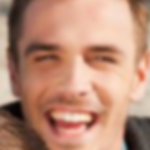

چهره 1 ذخیره شد: faces/face_1.jpg


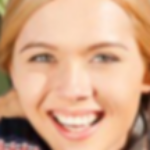

چهره 2 ذخیره شد: faces/face_2.jpg


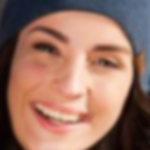

چهره 3 ذخیره شد: faces/face_3.jpg


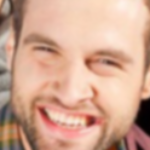

چهره 4 ذخیره شد: faces/face_4.jpg


In [ ]:
output_folder = "faces"
os.makedirs(output_folder, exist_ok=True)

for i, (x, y, w, h) in enumerate(faces):
    face = image[y:y+h, x:x+w]
    face = cv2.resize(face, (150, 150))
    face_path = os.path.join(output_folder, f"face_{i+1}.jpg")
    cv2.imwrite(face_path, face)
    cv2_imshow(face)
    print(f"چهره {i+1} ذخیره شد: {face_path}")


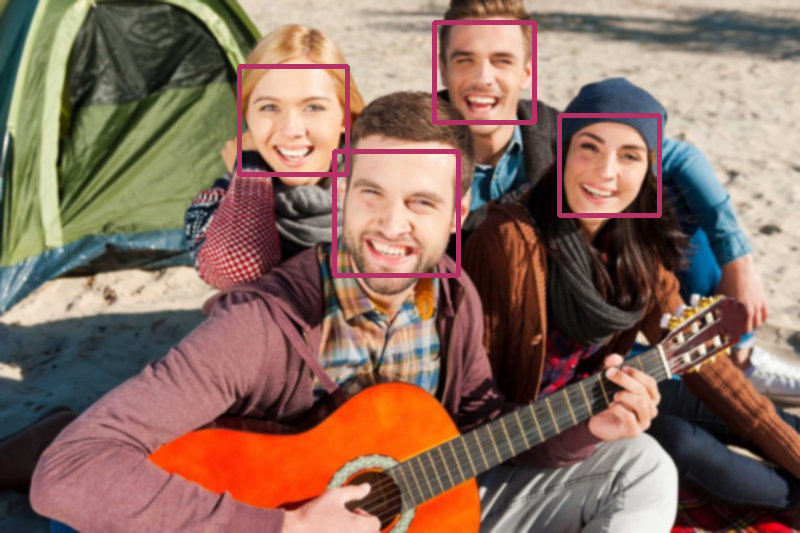

True

In [ ]:
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (100, 50, 180), 3)

cv2_imshow(image)
cv2.imwrite(face_path, image)



In [ ]:
!pip install mediapipe


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 21.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.7 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
grpcio-

# Detection With Mediapipe

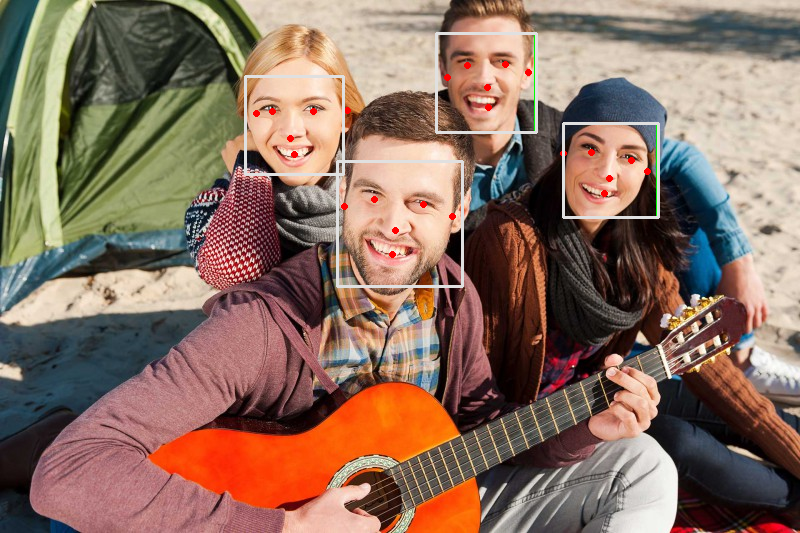

In [ ]:
import cv2
import mediapipe as mp

mp_face = mp.solutions.face_detection
mp_draw = mp.solutions.drawing_utils

image = cv2.imread("/content/image7.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

with mp_face.FaceDetection(model_selection=1, min_detection_confidence=0.6) as face_detector:
    results = face_detector.process(image_rgb)

    if results.detections:
        for detection in results.detections:
            bboxC = detection.location_data.relative_bounding_box
            ih, iw, _ = image.shape
            x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), \
                         int(bboxC.width * iw), int(bboxC.height * ih)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            mp_draw.draw_detection(image, detection)

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Hybrid Detection


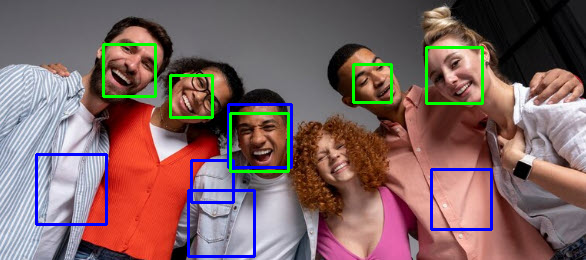

In [144]:
import cv2
import mediapipe as mp
import os
from google.colab.patches import cv2_imshow


haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


mp_face = mp.solutions.face_detection
mp_draw = mp.solutions.drawing_utils


image_path = "/content/image8.jpg"
image = cv2.imread(image_path)
if image is None:
    print("خطا! مسیر تصویر را بررسی کنید.")
else:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    faces_haar = haar_cascade.detectMultiScale(image_gray, scaleFactor=1.01, minNeighbors=8, minSize=(40, 40))

    for (x, y, w, h) in faces_haar:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2) #Haar


    with mp_face.FaceDetection(model_selection=1, min_detection_confidence=0.6) as detector:
        results = detector.process(image_rgb)

        if results.detections:
            for detection in results.detections:
                bbox = detection.location_data.relative_bounding_box
                ih, iw, _ = image.shape
                x = int(bbox.xmin * iw)
                y = int(bbox.ymin * ih)
                w = int(bbox.width * iw)
                h = int(bbox.height * ih)
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2) #mediapipe


    cv2_imshow(image)
